In [4]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv(r'C:\Users\jakob\Documents\GitHub\bmd\files\UNet\results\fold_0\log\20240420_203902.csv')
df

,epoch,dc,loss,se,val_dc,val_loss,val_se
0,0,0.019500,0.966398,0.815439,0.027582,0.954123,0.816614
1,1,0.031757,0.948652,0.809998,0.028268,0.952194,0.911920
2,2,0.039323,0.938715,0.771823,0.034391,0.941933,0.966825
3,3,0.049248,0.924108,0.790042,0.044896,0.926743,0.863478
4,4,0.052475,0.922132,0.750256,0.054507,0.921820,0.451661
...,...,...,...,...,...,...,...
355,355,0.066935,0.936231,0.066952,0.007686,0.992847,0.007686
356,356,0.064073,0.937465,0.064087,0.007686,0.992847,0.007686
357,357,0.054425,0.946615,0.054437,0.007686,0.992847,0.007686
358,358,0.126140,0.874791,0.126172,0.007686,0.992847,0.007686


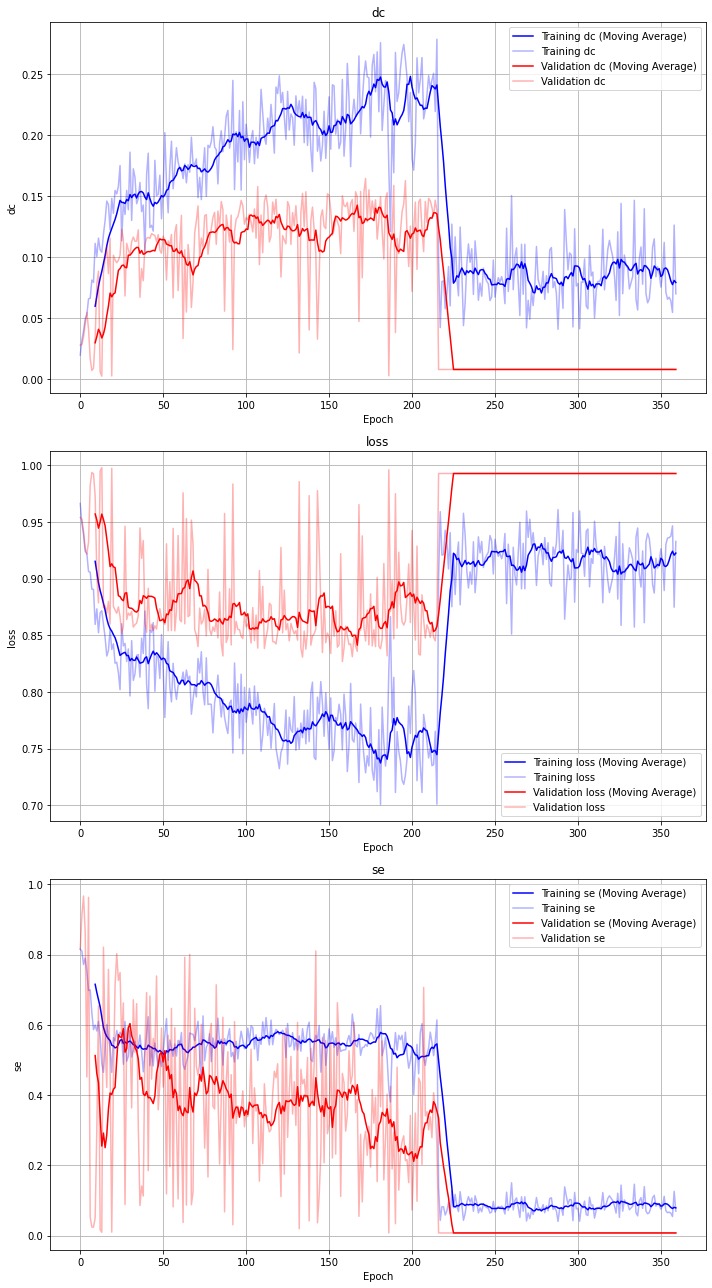

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


# Load the CSV file
df = pd.read_csv(r'C:\Users\jakob\Documents\GitHub\bmd\files\UNet\results\fold_0\log\20240420_203902.csv')

# Get the list of columns
columns = df.columns

# Calculate moving average with window size 10 for each column
df_ma = df.rolling(window=10).mean()

# Create subplots for the first three columns
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot each column with moving average
for i, column in enumerate(columns[1:4]):
    # Training data
    axs[i].plot(df['epoch'], df_ma[column], label='Training ' + column + ' (Moving Average)', color='blue')
    axs[i].plot(df['epoch'], df[column], label='Training ' + column, alpha=0.3, color='blue')  # Original data for reference
    
    # Validation data (if it exists)
    val_column = 'val_' + column
    if val_column in df.columns:
        axs[i].plot(df['epoch'], df_ma[val_column], label='Validation ' + column + ' (Moving Average)', color='red')
        axs[i].plot(df['epoch'], df[val_column], label='Validation ' + column, alpha=0.3, color='red',)  # Original data for reference
    
    axs[i].set_title(column)
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel(column)
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()